## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

## 1. Data Loading and Cleaning 
In this step, we load our dataset and perform an initial inspection:
* View general information about the data using `.info()`
* Check for missing values using `.isna().sum()`

In [3]:
data = pd.read_csv(r"D:\\my_projects\\project_gate_AB\\data\\cookie_cats.csv")
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

**Conclusion:**  
The data is clean, with no missing values detected.  
We can now proceed to the Exploratory Data Analysis (EDA) phase.

## 2. Exploratory Data Analysis (EDA)
Now that the data is clean, we'll dive deeper. The first step in analyzing an A/B test is to check if the two groups have a similar number of players.
### 2.1 Checking Group Sizes

In [4]:
group_size = data['version'].value_counts()
print(group_size)

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64


**Conclusion on Group Sizes:**
While the number of players in the two groups is not exactly equal, the difference is small and not critical. It is normal for A/B tests to have a slight difference in sample sizes. This confirms the groups are well-balanced enough for a reliable analysis.

### 2.2 Analyzing 'sum_gamerounds'
Let's look at the distribution of the `sum_gamerounds` column, which is a key indicator of player engagement. We'll start by looking at its summary statistics to identify potential skewness or outliers.

In [5]:
data['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

**Observation:** There is a huge difference between the mean (~52) and the median (16), and the max value (49.854) is extremely high compared to the 75th percentile (51). This confirms that the data is highly skewed and there is at least one extreme outlier.

Let's use a box plot to visualize this.

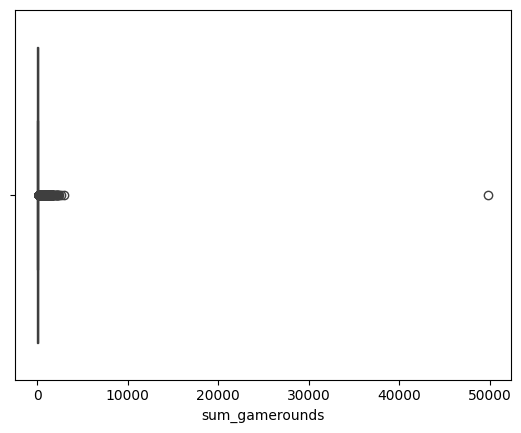

In [6]:
s_game_r = sns.boxplot(x = data['sum_gamerounds'])
plt.show()

The box plot confirms our suspicion: the vast majority of players are clustered at the low end, and there is one extreme data point that skews the entire dataset. This is likely a bug or a test account and should be removed for a meaningful analysis.

In [7]:
data = data[data['sum_gamerounds'] < 40000]
data['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

After removing the single outlier, the maximum value is now much more reasonable. Let's create another box plot to see the new distribution of our player base.

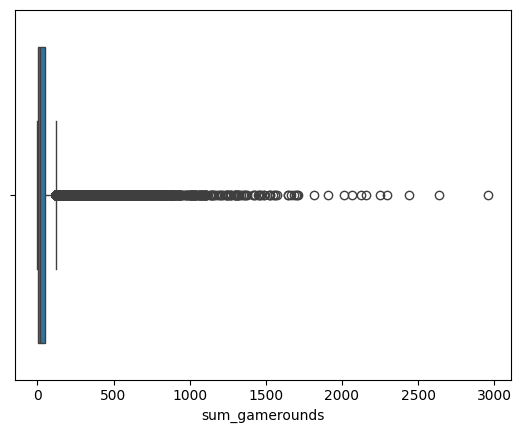

In [8]:
sns.boxplot(x = data['sum_gamerounds'])
plt.show()

### 2.3 Analyzing Player Behavior by Group
The box plot shows a heavily skewed distribution, which is common in gaming data. The "outliers" are not errors but represent our most engaged players. Our goal now is to compare the engagement (`sum_gamerounds`) between the two groups (`gate_30` and `gate_40`).

We can do this by grouping the data by `version` and calculating summary statistics.

In [16]:
data.groupby('version')['sum_gamerounds'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
version,,,,,,
gate_30,44699,51.342111,17.0,102.057598,0,2961
gate_40,45489,51.298776,16.0,103.294416,0,2640


**EDA Conclusion:**

The exploratory data analysis is complete. We have confirmed that the group sizes are balanced and have handled the extreme outlier in `sum_gamerounds`. The dataset is now clean and ready for formal hypothesis testing.

## 3. Hypothesis Formulation

Now that we have cleaned and explored the data, it's time to formally state our hypotheses for the A/B test.

* **Null Hypothesis (H₀):** There is **no difference** in player retention (both 1-day and 7-day) between the two groups (`gate_30` and `gate_40`). Any observed difference is due to random chance.

* **Alternative Hypothesis (H₁):** There is **a significant difference** in player retention (both 1-day and 7-day) between the two groups.

Our goal is to gather statistical evidence to either reject the null hypothesis in favor of the alternative, or fail to reject it.
print(data.head(1))